In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('ad_agency_new.csv')
data.shape

(4166, 24)

In [3]:
data.isna().sum()


id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [4]:
cat_col=[feature for feature in data.columns if data[feature].dtypes=='O']
print(f'cat columns:{cat_col}')
num_col=[feature for feature in data.columns if data[feature].dtypes!='O']
print(f'num columns:{num_col}')


cat columns:['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']
num columns:['id', 'click', 'hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']


<AxesSubplot:>

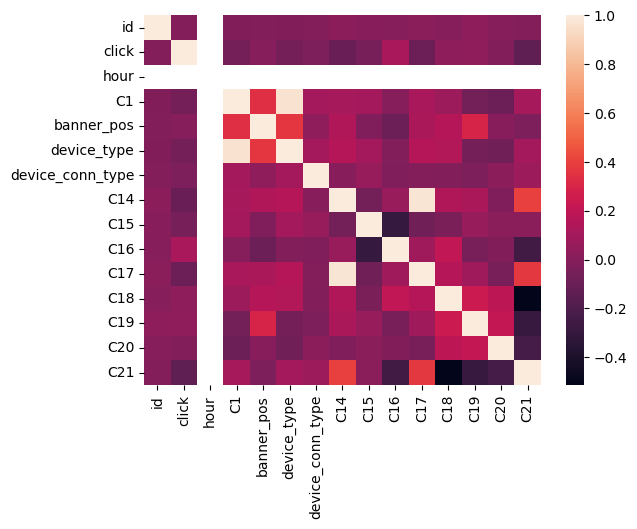

In [5]:
sns.heatmap(data[num_col].corr())

In [25]:
df=data.drop(columns=['hour','C1','C14'],axis=1)

In [26]:
cat_col=[feature for feature in data.columns if data[feature].dtypes=='O']
cat_col

['site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model']

In [27]:
print(df['site_id'].value_counts())
print('='*20)
print(df['site_domain'].value_counts())
print('='*20)
print(df['site_category'].value_counts())
print('='*20)
print(df['app_id'].value_counts())
print('='*20)
print(df['app_domain'].value_counts())
print('='*20)
print(df['app_category'].value_counts())
print('='*20)
print(df['device_id'].value_counts())
print('='*20)
print(df['device_ip'].value_counts())
print('='*20)
print(df['device_model'].value_counts())
print('='*20)

1fbe01fe    1497
85f751fd     875
543a539e     286
d9750ee7     130
e151e245     113
            ... 
95be0243       1
178a7b89       1
b64a28fc       1
bfc04b95       1
3281baa7       1
Name: site_id, Length: 251, dtype: int64
f3845767    1497
c4e18dd6     945
c7ca3108     286
98572c79     133
7e091613     121
            ... 
132080af       1
bfa24f16       1
de502fb2       1
a21b389d       1
61eac15d       1
Name: site_domain, Length: 209, dtype: int64
28905ebd    1607
50e219e0    1013
f028772b     837
3e814130     509
76b2941d      92
335d28a8      44
0569f928      27
72722551      12
f66779e6      10
75fa27f6      10
c0dd3be3       2
110ab22d       1
bcf865d9       1
a818d37a       1
Name: site_category, dtype: int64
ecad2386    3291
febd1138     102
e2fcccd2      87
0acbeaa3      56
5e3f096f      42
            ... 
43e71b2b       1
d03cc6b3       1
278c9e8d       1
8bfb92e0       1
f57b9cd0       1
Name: app_id, Length: 183, dtype: int64
7801e8d9    3454
2347f47a     299
82e2799

In [28]:
df=df.drop(columns=['id','site_id','site_domain','app_id','device_id','device_model','device_ip'],axis=1)

In [29]:
df.columns

Index(['click', 'banner_pos', 'site_category', 'app_domain', 'app_category',
       'device_type', 'device_conn_type', 'C15', 'C16', 'C17', 'C18', 'C19',
       'C20', 'C21'],
      dtype='object')

In [31]:
others_site=['0569f928','76b2941d','f66779e6','335d28a8','72722551','75fa27f6','110ab22d',
             'c0dd3be3', 'bcf865d9', 'a818d37a']
df['site_category']=df['site_category'].replace(to_replace=others_site,value='other_site')

In [32]:
othr_app_dmn=['d9b5648e','45a51db4','5c5a694b', '0654b444', 'aefc06bd', '33da2e74', 'ad63ec9b',
              '5b9c592b', 'ae637522', '885c7f3f', 'b9528b13', '813f3323', 'c6824def', 'b5f3b24a',
              '5c620f04', '43cf4f06', 'f2f777fb','18eb4e75']
df['app_domain']=df['app_domain'].replace(to_replace=othr_app_dmn,value='other_app_domain')

In [33]:
othr_app_cat=['cef3e649', '8ded1f7a', '75d80bbe', '4ce2e9fc', 'd1327cf5', '09481d60']
df['app_category']=df['app_category'].replace(to_replace=othr_app_cat,value='other_app_cat')

In [34]:
df['click'].value_counts()

0    3462
1     704
Name: click, dtype: int64

In [67]:
X=df.drop(columns=['click'],axis=1)
y=df['click']

In [68]:
print(X.shape)
print(y.shape)

(4166, 13)
(4166,)


In [69]:
cat_col1=[feature for feature in X.columns if X[feature].dtypes=='O']
num_col1=[feature for feature in X.columns if X[feature].dtypes!='O']

In [70]:
print(cat_col1)
print(num_col1)

['site_category', 'app_domain', 'app_category']
['banner_pos', 'device_type', 'device_conn_type', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']


In [71]:
X['site_category'].value_counts()

28905ebd      1607
50e219e0      1013
f028772b       837
3e814130       509
other_site     200
Name: site_category, dtype: int64

In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score,classification_report,accuracy_score

In [73]:
num_pipeline=Pipeline(steps=(['imputer',SimpleImputer(strategy='median')],
                            ['scaler',StandardScaler()]))
cat_pipeline=Pipeline(steps=(['imputer',SimpleImputer(strategy='most_frequent')],
                            ['encoder',OneHotEncoder()]))
preprocessor=ColumnTransformer([('numerical_pipeline',num_pipeline,num_col1),
                              ('categorical_pipeline',cat_pipeline,cat_col1)])

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=35)

In [75]:
print(X_train.shape)
print(X_test.shape)

(2916, 13)
(1250, 13)


In [76]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [77]:
models={'LogisticRegression': LogisticRegression(),
       'RandomForest':RandomForestClassifier(),
       'GradientBoosting':GradientBoostingClassifier()}
params={'LogisticRegression':{'max_iter':[100],'penalty':['l2']},
       'RandomForest':{'n_estimators': [100,300,500],'max_depth':[15],'min_samples_split':[5],'random_state':[1]},
       'GradientBoosting':{'n_estimators': [100,300,500],'max_depth':[15],'min_samples_split' :[5],'random_state':[1]}}

In [80]:
def evaluate_models(X_train,X_test,y_train,y_test,models,params):
    report={}
    for i in range(len(list(models))):
        model=list(models.values())[i]
        param=params[list(models.keys())[i]]
        
        gs=GridSearchCV(model,param,cv=3)
        gs.fit(X_train,y_train)
        
        model.set_params(**gs.best_params_)
        model.fit(X_train,y_train)
        
        y_test_pred=model.predict(X_test)
        f1score=(f1_score(y_test,y_test_pred))*100
        
        print(f'{list(models.keys())[i]} :')
        print(classification_report(y_test,y_test_pred))
        
        report[list(models.keys())[i]]=f1score
        
        best_score=max(list(report.values()))
        best_model=list(filter(lambda x:report[x]==best_score,report))[0]
    print(f'The Best score of models:{best_model} : {best_score}')
    return report

In [82]:
evaluate_models(X_train,X_test,y_train,y_test,models,params)

LogisticRegression :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1044
           1       0.33      0.00      0.01       206

    accuracy                           0.83      1250
   macro avg       0.58      0.50      0.46      1250
weighted avg       0.75      0.83      0.76      1250

RandomForest :
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1044
           1       0.41      0.13      0.20       206

    accuracy                           0.83      1250
   macro avg       0.63      0.55      0.55      1250
weighted avg       0.78      0.83      0.79      1250

GradientBoosting :
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1044
           1       0.46      0.16      0.23       206

    accuracy                           0.83      1250
   macro avg       0.65      0.56      0.57      1250
weighted avg       

{'LogisticRegression': 0.9569377990430622,
 'RandomForest': 19.852941176470587,
 'GradientBoosting': 23.188405797101446}